In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy import stats
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize

In [3]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from studentsperformance',con=engine)

# No need for an open connection, 
# because you're only doing a single query
engine.dispose()

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to student performances in exams?

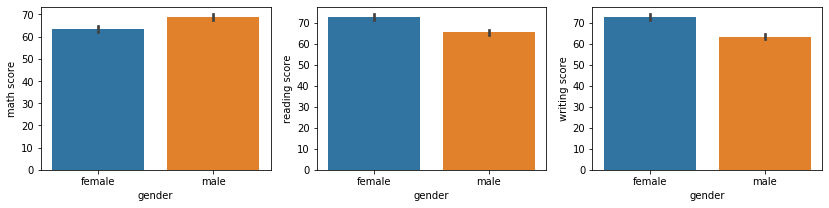

In [19]:
plt.figure(figsize=(14,3))
plt.subplot(1,3,1)
sns.barplot(df['gender'],df['math score'])
plt.subplot(1,3,2)
sns.barplot(df['gender'],df['reading score'])
plt.subplot(1,3,3)
sns.barplot(df['gender'],df['writing score'])
plt.show()

In [44]:
stats.ttest_ind(df[df['gender']=='male'][['math score','reading score','writing score']],df[df['gender']=='female'][['math score','reading score','writing score']])

Ttest_indResult(statistic=array([ 5.38324587, -7.95930801, -9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

## There is significant difference between genders in performance, Females are better in writing and reading and male are better in math. 

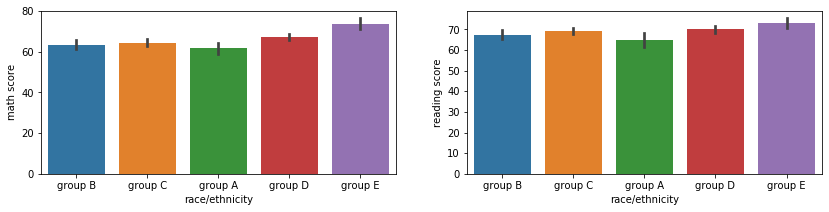

In [25]:
plt.figure(figsize=(14,3))
plt.subplot(1,2,1)
sns.barplot(df['race/ethnicity'],df['math score'])
plt.subplot(1,2,2)
sns.barplot(df['race/ethnicity'],df['reading score'])

In [47]:
race=df['race/ethnicity'].unique()
grouped=df.groupby('race/ethnicity')

In [56]:
for grade in ["math score", "reading score", "writing score"]:
    print('compare: {}'.format(grade))
    for i in range (0,len(race)):
        for j in range(i+1,len(race)):
            print('t-test betweeen {0} and {1} : '.format(race[i],race[j]))
            print(stats.ttest_ind(df[df['race/ethnicity']==race[i]][grade], df[df['race/ethnicity']==race[j]][grade]))

compare: math score
t-test betweeen group B and group C : 
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test betweeen group B and group A : 
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test betweeen group B and group D : 
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test betweeen group B and group E : 
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test betweeen group C and group A : 
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test betweeen group C and group D : 
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test betweeen group C and group E : 
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test betweeen group A and group D : 
Ttest_indResult(statistic=-3.3466982429712298, pvalue=0.0009068636053543751)
t-test betweeen group A and group E : 
Ttest_indResult(statistic=-5.93

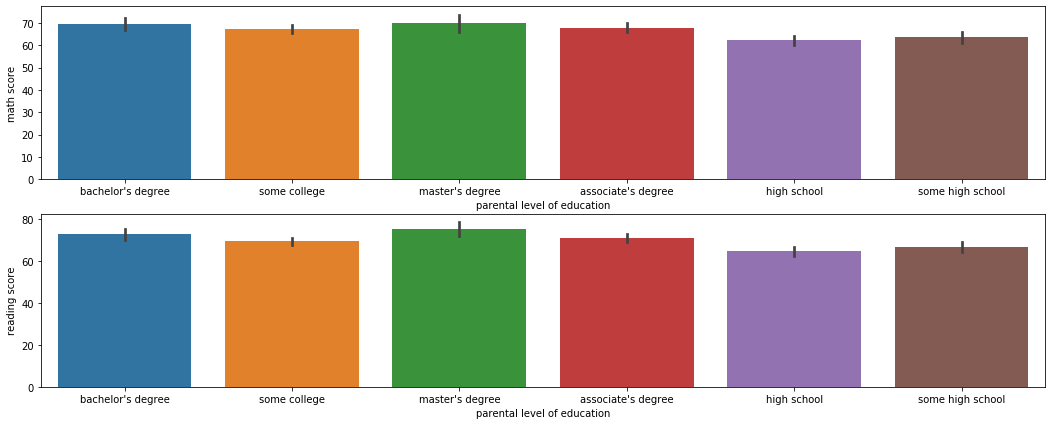

In [35]:
plt.figure(figsize=(18,7))
plt.subplot(2,1,1)
sns.barplot(df['parental level of education'],df['math score'])
plt.subplot(2,1,2)
sns.barplot(df['parental level of education'],df['reading score'])

In [53]:
groupdf=df.groupby(['parental level of education'])
levels=df['parental level of education'].unique()
levels

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [59]:
for grade in ["math score", "reading score", "writing score"]:
    print('-------------------------------')
    print('Compare for {}'.format(grade))
    for i in range (0,len(levels)):
        for j in range (i+1, len(levels)):
            print('ttest between level of education {0} and {1}'.format(levels[i],levels[j]))
            print(stats.ttest_ind(df[df['parental level of education']==levels[i]][grade],df[df['parental level of education']==levels[j]][grade]))
    

-------------------------------
Compare for math score
ttest between level of education bachelor's degree and some college
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
ttest between level of education bachelor's degree and master's degree
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
ttest between level of education bachelor's degree and associate's degree
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
ttest between level of education bachelor's degree and high school
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
ttest between level of education bachelor's degree and some high school
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
ttest between level of education some college and master's degree
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
ttest between level of education some college and associate's degree
Ttest_ind

## 2.Are there any differences between the lunch types with respect to student performances in exams? If there are, how do you explain this? 

In [60]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [63]:
df.groupby(df['lunch']).mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [61]:
stats.ttest_ind(df[df['lunch']=='standard'][["math score", "reading score", "writing score"]],df[df['lunch']=='free/reduced'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([11.83718047,  7.45105647,  8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

## 3.Does the test preparation course seem to have an effect on the exam performances? 

In [64]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [65]:
df.groupby(df['test preparation course']).mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [66]:
stats.ttest_ind(df[df['test preparation course']=='none'][["math score", "reading score", "writing score"]],df[df['test preparation course']=='completed'][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ -5.70461642,  -7.87166354, -10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

## 4.Which two exam scores are most correlated with each other?

In [67]:
df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000
